In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from PIL import Image

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\raghavrpotdar\fresh-and-stale-images-of-fruits-and-vegetables\versions\1


In [13]:
data_dir = path
categories = os.listdir(data_dir)

In [17]:
data_dir = r'C:\Users\Hp\.cache\kagglehub\datasets\raghavrpotdar\fresh-and-stale-images-of-fruits-and-vegetables\versions\1'

images = []
labels = []


categories = os.listdir(data_dir)

for category in categories:
    category_path = os.path.join(data_dir, category)
    

    if os.path.isdir(category_path):
        label = categories.index(category)  
        
    
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            
            try:
        
                img = cv2.imread(img_path)
                if img is not None: 
                    img = cv2.resize(img, (128, 128))  
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Invalid image file: {img_path}")
            except Exception as e:
                print(f"Error loading image: {img_path}, Error: {e}")
    else:
        print(f"Skipping non-directory item: {category_path}")

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images and {len(labels)} labels.")

Skipping non-directory item: C:\Users\Hp\.cache\kagglehub\datasets\raghavrpotdar\fresh-and-stale-images-of-fruits-and-vegetables\versions\1\ImageLabels.txt
Loaded 14682 images and 14682 labels.


In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [21]:
X_train= X_train/255.0
X_val=X_val/255.0
X_test=X_test/255.0

In [25]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model_train= model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 105s 317ms/step - accuracy: 0.4372 - loss: 1.6132 - val_accuracy: 0.8070 - val_loss: 0.5580
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 128s 398ms/step - accuracy: 0.7661 - loss: 0.6500 - val_accuracy: 0.8501 - val_loss: 0.3856
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 130s 405ms/step - accuracy: 0.8477 - loss: 0.4276 - val_accuracy: 0.9187 - val_loss: 0.2195
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 130s 402ms/step - accuracy: 0.8824 - loss: 0.3218 - val_accuracy: 0.9024 - val_loss: 0.2717
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 133s 412ms/step - accuracy: 0.8740 - loss: 0.3455 - val_accuracy: 0.9287 - val_loss: 0.1697
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 132s 410ms/step - accuracy: 0.9117 - loss: 0.2433 - val_accuracy: 0.9242 - val_loss: 0.1929
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 93s 287ms/step - accuracy: 0.9260 - loss: 0.1980 - val_accuracy: 0.9337 - val_loss: 0.1646
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 146s 300ms/step - accuracy: 0.9293 - 

In [29]:
test_loss, test_acc= model.evaluate(X_test, y_test)
print(f"Test Accuracy {test_acc*100:.2f}%")

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9565 - loss: 0.1241
Test Accuracy 94.92%


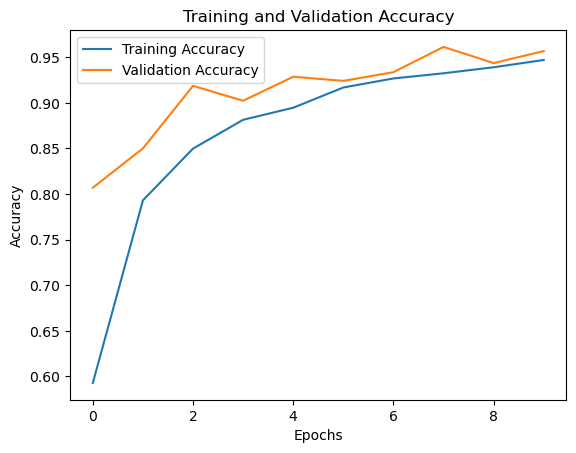

In [37]:
plt.plot(model_train.history['accuracy'], label='Training Accuracy')
plt.plot(model_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()